# Catching Heuristics Are Robust to Systematic Disturbances  and Can Be Found by Reinforcement Learning

## Supplementary Material: Angular Representations Violate Markov Property (Proofs)

This material accompanies my doctoral thesis *On Decomposability in Robot Reinforcement Learning* and the paper *Catching Heuristics Are Robust to Systematic Disturbances  and Can Be Found by Reinforcement Learning*.

&copy; 2017 Sebastian Höfer


The notebook provides proofs showing that the angular representations used by heuristics for ball catching are not Markov.

In [2]:
import sympy as sp
from sympy.utilities.lambdify import lambdify
import numpy as np
import copy

sp.init_printing()

In [3]:
%pylab inline

import matplotlib
matplotlib.rcParams['ps.useafm'] = False
matplotlib.rcParams['pdf.use14corefonts'] = False
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['figure.autolayout'] = False

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman'], 'size': 24})

#matplotlib.use('pdf')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


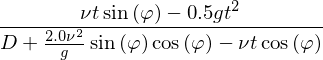

In [4]:
# HElPER FUNCTIONS
# sympy has problems of simplifying (V^2 sin(phi)^2)^{1/2} to V sin(phi)
def sympy_sqrt_fix(formula):
#  return sp.simplify(formula.subs((V**2*sp.sin(phi)**2)**(0.5), V*sp.sin(phi)))
  return sp.simplify(formula.subs(sp.sqrt( (V**2) * (sp.sin(phi))**2), V*sp.sin(phi)))
def zero_yb0(formula, val=0):
  return sympy_sqrt_fix(formula.subs(yb0,val))

GRAVITY=9.81

t, yb0, phi, V, g, vr = sp.symbols("t, b_{y0}, \\varphi, \\nu, g, v_r")
yb0 = 0 # simplify: y_b=0
yb = V*sp.sin(phi)*t - 0.5*g*t*t + yb0
xb = V*sp.cos(phi)*t

T = sp.solve(yb, t)[1]
R = xb.subs(t, T)
D = sp.symbols("D")
a0 = R+D # starting position

# Set-up Eq.(1) - the tan alpha(t), based on yb

a = R+D   # assume is not moving
#a = sp.symbols("a_0")

theta =  yb/(a-xb)
theta

$= \theta_t$  (the tangent of the angle)

In [4]:
def concrete_case(formula, V_, phi_, yb0_=0):
	global GRAVITY
	return formula.subs(g,GRAVITY).subs(V,V_).subs(phi,phi_).subs(yb0,yb0_)

def concrete_trajectory(formula, V_, phi_, T_=None, yb0_=0, N=100, t=t):
    if T_ is None:
        T_ = concrete_case(T, V_, phi_, yb0_)
        
    time = np.linspace(0, float(T_), N)
    res = []
    for t_ in time:
        res.append(concrete_case(formula, V_, phi_, yb0_).subs(t, t_))
    res = np.array(res) 
    return res, time, time[1]-time[0]




We now show that neither $\theta, \dot{\theta}$ nor $\ddot{\theta}$ fulfill the Markov property. 
In all cases, the ansatz is to find a counterexample showing that $x \in \{\theta, \dot{\theta}, \ddot{\theta} \}$ violates the Markov property. 

<!-- don't copy over -->

Intuitively, such a counterexample can be found as follows. The quantity $x \in 
\{\theta, \dot{\theta}, \ddot{\theta} \}$ is a representation that varies over 
time, and its dynamics are governed by some set if initial conditions $A$, 
which we make explicit by writing $x_A(t)$. 
We know that $x$ violates the Markov property if we cannot predict its value at 
the next time step from its value at the current time-step. This is equivalent 
to showing that there exists different set of 
initial conditions $A$ and $B$, $A \neq B$, and time steps $t_A, t_B$, such 
that (i) the values of $x$ at time $t$ for the different initial conditions are 
identical, $x_A(t_A) = x_B(t_B)$ but (ii) their first derivatives differ
$\dot{x}_A(t_A) \neq \dot{x}_B(t_B)$. 

In the ball catching scenario, the dynamics of quantity $x \in \{\theta, 
\dot{\theta}, \ddot{\theta} \}$ are governed by the initial conditions $\{\nu, 
\phi \}$, corresponding to the initial ball velocity and angle, but also by the 
agent's motion $a(t)$ (see Eq.~\ref{eq:tan_alpha_definition}).
To simplify the proofs, we will assume (w.l.o.g.) a trivial agent trajectory, 
with fixed $D$ and a static agent, $a(t) = R + D = a_0$. It is sufficient to 
analyze this special case, since for a representation to be Markov means that 
it must be Markov for all possible agent trajectories. 

Note that we are only considering one-dimensional angular representations, not 
combinations of derivatives of $\theta$. The reason is that the heuristic 
control strategies presented in Section~\ref{subsec:vva_control} only rely on 
one-dimensional representations.



## Non-Markov $\theta$

We begin with the simplest case, $\theta$.

We know that $\theta$ is linear if the agent is waiting at the landing point ($D=0$), and that the trajectory of $\theta$ has slope $\dot{\theta}$. Therefore, we consider this special case, and search for two different sets of initial parameters $A = \{\nu_A, \phi_A \}$,  $B = \{\nu_B, \phi_B \}$ and time steps $t_A$ and $t_B$ such that
(i) $\theta_{A}(t_A) = \theta_{B}(t_B)$ and (ii) $\dot{\theta}_{A}(t_A) \neq \dot{\theta}_{B}(t_B)$.

We now compute the values of $\theta$ and its derivatives for the special case $D=0$ that we consider.

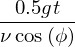

In [5]:
theta_D0 = theta.subs(D,0).simplify()
theta_D0
#t_eq  = sp.solve(tan_alpha_eq_D0,t)
#t_eq

$=\theta$. Now compute the derivative for the simplified expression

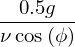

In [6]:
dtheta_D0 = sp.simplify(sp.diff(theta_D0, t))
dtheta_D0

$= \dot{\theta}_A$. 

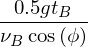

In [7]:
t_a, t_B, V_A, V_B = sp.symbols(r"t_A t_B \nu_A \nu_B")

t2, V2, = sp.symbols(r"t_B \nu_B")

theta_D0_bar = theta_D0.subs(t, t2).subs(V, V2)#.subs(phi, phi2)
theta_D0_bar

$= {\theta}_B$. 


As known from Section~\ref{subsubsec:chapman}, the slopes $\dot{\theta}_A$ and $\dot{\theta}_B$ are constant, solely depending on the initial parameters $A$ and $B$ (and gravity). Therefore, the only way to make them different, and thus fulfill equation (ii), is to choose different initial parameters. W.l.o.g., we assume $\nu_A \neq \nu_B$ and $\phi_A = \phi_B$. We now need to find time steps $t_A$ and $t_B$ such that equation (i) is fulfilled, $\theta_A({t_A}) = \theta_B({t_B})$. By solving this equation for $t_A$, we obtain:

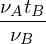

In [8]:
t_of_tbar = sp.solve(theta_D0_bar - theta_D0, t)[0]
t_of_tbar.subs(V, V_A)

$=t_A$. 

Therefore, (i) $\theta_A(t_A) = \theta_A(\nu_A {\nu_B}^{-1} t_B) = \theta_B(t_B)$, but by construction (ii) $\dot{\theta}_A(t_A) \neq \dot{\theta}_B(t_B)$. This shows **that $\theta$ is not Markov**.

## Non-Markov $\dot{\theta}$

Next, we show that $\dot{\theta}$ is not Markov either.
As before, we search for two different sets of initial parameters $A = \{\nu_A, \phi_A \}$,  $B = \{\nu_B, \phi_B \}$ and time steps $t_A$ and $t_B$, but this time with the goal of showing that
(i) $\dot{\theta}_{A}(t_A) = \dot{\theta}_{B}(t_B)$ and (ii) $\ddot{\theta}_{A}(t_A) \neq \ddot{\theta}_{B}(t_B)$.

This case is a bit more involved as we cannot assume that the agent waits at landing point, i.e. we cannot assume $a(t)=R$, $D=0$. The reason is that for this case $\dot{\theta}$ is constant and thus $\ddot{\theta}$ is zero, which makes the representation Markov in a trivial way. <!-- This makes the resulting equations highly non-linear and more difficult to solve. -->

Our ansatz is to create an explicit dependency between $\nu_A$ and $\nu_B$ as well as $t_A$ and $t_B$, and then solve for the parameters such that they fulfill (i) and (ii). W.l.o.g., we will keep $\phi_A = \phi_B$, and define $\nu_B = \nu_A + \epsilon$ by some $\epsilon \neq 0$, and define $t_B = t_A + \delta$ for some $\delta \neq 0$ and solve for  $\delta$.

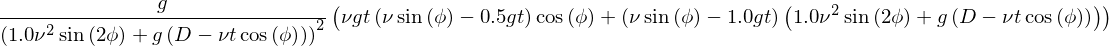

In [9]:
dtheta = sp.simplify(sp.diff(theta, t))
dtheta

$= \dot{\theta}(t)$.

Additionally, we need to ensure that $D \neq 0$ (and $D \neq -R$, i.e. it must not coincide with the ball starting position because then $\theta$ is linear, too). Since we are only interested in a counterexample, we can set $D$ to an arbitrary value and use $D = -\frac{R}{2}$. This means the agent is standing exactly in the middle between the ball's starting and landing point.

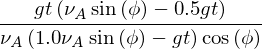

In [10]:
D_ = -R/2
T_DR2 = T.subs(D, D_).simplify()

theta_DR2 = theta.subs(D, D_).simplify()
theta_DR2.subs(V, V_A)

$= {\theta}_A(t)$.

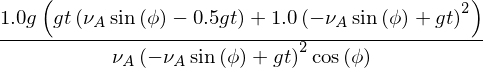

In [11]:
dtheta_DR2 = sp.diff(theta_DR2,t).simplify()
dtheta_DR2.subs(V, V_A)

$= \dot{\theta}_A(t)$.

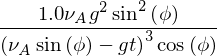

In [12]:
ddtheta_DR2 = sp.diff(dtheta_DR2,t).simplify()
ddtheta_DR2.subs(V, V_A)

$= \ddot{\theta}_A(t)$.

In [13]:
#t2 = sp.symbols(r"\bar{t}")
eps = sp.symbols(r"\varepsilon")
delta = sp.symbols(r"\delta")
t2 = t+delta
V2 = V*eps

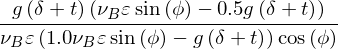

In [14]:
theta_DR2_bar = theta_DR2.subs(V, V2).subs(t, t2).simplify()
theta_DR2_bar.subs(V, V_B)

$= {\theta}_B(t)$.

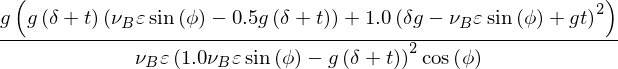

In [15]:
dtheta_DR2_bar = sp.diff(theta_DR2_bar, t).simplify()
dtheta_DR2_bar.subs(V, V_B)

$= \dot{\theta}_B(t)$.

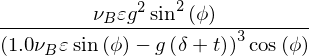

In [16]:
ddtheta_DR2_bar = sp.diff(dtheta_DR2_bar, t).simplify()
ddtheta_DR2_bar.subs(V, V_B)

$= \ddot{\theta}_B(t)$.

By solving $\ddot{\theta}_A(t_A) = \ddot{\theta}_B(t_B)$ for $\delta$, we obtain two conjugate solutions, from which we choose the positive one:

In [17]:
dtheta_bar_delta = sp.solve(dtheta_DR2_bar-dtheta_DR2,delta)


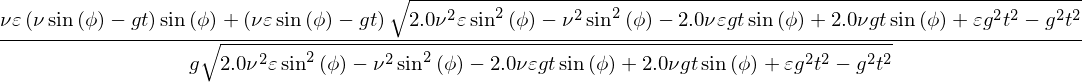

In [18]:
dtheta_bar_delta[1]

$= \delta$

A sanity check using concrete values for the initial conditions ($\nu = 30 \frac{m}{s}, \phi = \frac{\pi}{4}$), $t_A = T_A$ and $\varepsilon = 1.1$ shows that:

In [19]:
V_cc = 30.
phi_cc = np.pi/4
t_cc = T_DR2
eps_cc = 1.1

# Example:
delta_bar_ = concrete_case(dtheta_bar_delta[1].subs(eps, eps_cc).subs(t, t_cc), V_=V_cc, phi_=phi_cc)
t_A_ = concrete_case(T_DR2, V_=V_cc, phi_=phi_cc )
print (r" t_A = %f" % t_A_)
print (r" \delta = %f => t_B = %f" % (delta_bar_, t_A_ + delta_bar_ ))

print (r" \dot{theta}_A(t_A) = %f" % concrete_case(dtheta_DR2.subs(t, t_cc), V_=V_cc, phi_=phi_cc ))
print (r" \dot{theta}_B(t_B) = %f" % concrete_case(dtheta_DR2_bar.subs(delta, delta_bar_).subs(t, t_cc)
                                        .subs(eps, eps_cc)
                                        .subs(delta, delta_bar_), 
              V_=V_cc, phi_=phi_cc ))

 t_A = 4.324812
 \delta = -4.117563 => t_B = 0.207249
 \dot{theta}_A(t_A) = 0.462448
 \dot{theta}_B(t_B) = 0.462448


Our sanity check confirms that $\dot{\theta}^A(t^A) = \dot{\theta}^B(t^A + \delta) = \dot{\theta}^B(t^B)$.

We now compare the second derivatives.

In [20]:
print (r" \ddot{\theta}_A = %f" % concrete_case(ddtheta_DR2.subs(t, t_cc), V_=V_cc, phi_=phi_cc ))
print (r" \ddot{\theta}_B = %f" % concrete_case(ddtheta_DR2_bar.subs(delta, delta_bar_).subs(t, t_cc)
                                        .subs(eps, eps_cc)
                                        .subs(delta, delta_bar_), 
              V_=V_cc, phi_=phi_cc ))

 \ddot{\theta}_A = -0.213858
 \ddot{\theta}_B = 0.232334


The values differ, and we have therefore successfully found a counterexample, showing that **$\dot{\theta}$ is not Markov**.

## Non-Markov $\ddot{\theta}$

Similar to the previous proof, we are now going to show that $\ddot{\theta}$ is not Markov, either.

We start by computing the third derivatives.

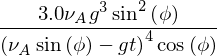

In [21]:
dddtheta_DR2 = sp.diff(ddtheta_DR2,t).simplify()
dddtheta_DR2.subs(V, V_A)

$=\dddot{\theta}_A(t)$

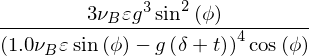

In [22]:
dddtheta_DR2_bar = sp.diff(ddtheta_DR2_bar, t).simplify()
dddtheta_DR2_bar.subs(V, V_B)

$=\dddot{\theta}_B(t)$

Now we solve for $\delta$, but in the second derivatives.

In [23]:
ddtheta_bar_delta = sp.solve(ddtheta_DR2_bar-ddtheta_DR2,delta)
#ddtheta_bar_delta

In [24]:
len(ddtheta_bar_delta)

In [25]:
V_cc = 1.
phi_cc = np.pi/4
t_cc = 0.1*T_DR2
eps_cc = 1.1

# Example:
t_A_ = concrete_case(T_DR2, V_=V_cc, phi_=phi_cc )
ddelta_bar_ = concrete_case(ddtheta_bar_delta[0].subs(eps, eps_cc).subs(t, t_cc), V_=V_cc, phi_=phi_cc)
print (r" t_A = %f" % t_A_)
print (r" \delta = %f => t_B = %f " % (ddelta_bar_, t_A_ + ddelta_bar_))
print (r" \ddot{\theta}_A = %f" % concrete_case(ddtheta_DR2.subs(t, t_cc), V_=V_cc, phi_=phi_cc ))
print (r" \ddot{\theta}_B = %f" % concrete_case(ddtheta_DR2_bar.subs(delta, ddelta_bar_).subs(t, t_cc)
                                        .subs(eps, eps_cc)
                                        .subs(delta, delta_bar_), 
              V_=V_cc, phi_=phi_cc ))

 t_A = 0.144160
 \delta = 0.005347 => t_B = 0.149507 
 \ddot{\theta}_A = 375.922266
 \ddot{\theta}_B = 375.922266


(Note that we chose a $t_A = 0.2 T$, otherwise the values quickly go towards inf.)

We check the third derivatives.

In [26]:
print (r" \dddot{\theta}_A = %f" % concrete_case(dddtheta_DR2.subs(t, t_cc), V_=V_cc, phi_=phi_cc ))
print (r" \dddot{\theta}_B = %f" % concrete_case(dddtheta_DR2_bar.subs(delta, delta_bar_).subs(t, t_cc)
                                        .subs(eps, eps_cc)
                                        .subs(delta, delta_bar_), 
              V_=V_cc, phi_=phi_cc ))

 \dddot{\theta}_A = 19557.499256
 \dddot{\theta}_B = 0.000777


The values differ, and we have therefore successfully found a counterexample, showing that **$\ddot{\theta}$ is not Markov**.